In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from keras.applications import ResNet50
from keras.layers import Dense,Flatten,Input
from keras.models import Model

In [2]:
df='/kaggle/input/rice-crop-diseases/Rice_Diseases'

In [12]:
dd=[]
for cur_dir, dirs, files in os.walk(df):
    for file in files:
        osy=os.path.join(cur_dir,file)
        if osy is not None:
            cv=cv2.imread(osy)
            if cv is not None:
                cv1=cv2.resize(cv,(300,300))
            
                dd.append(cv1)
#         print(osy)
# print(f'print: {osy}')
# dd

### 

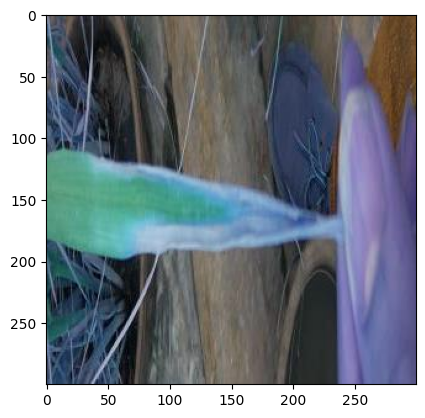

In [13]:

plt.imshow(dd[1])
plt.show()

In [14]:
dd[0].shape

(300, 300, 3)

In [16]:
dd=np.array(dd)
dd1=dd.reshape(dd.shape[0],-1)
df2=pd.DataFrame(dd1)

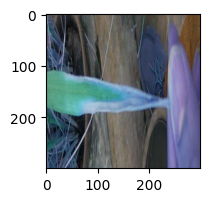

In [34]:
df3=df2.iloc[1].values.reshape(300,300,3)
plt.figure(figsize=(2,2))
plt.imshow(df3)
plt.show()


In [36]:
X=dd
# dd=
Y=[]
for i in X:
    i=0
    Y.append(i)
y=np.array(Y)
y.shape
# Y


(200,)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train.shape

(160, 300, 300, 3)

In [49]:
input_shape=(300,300,3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False

inputs=Input(shape=input_shape)
x=base_model(inputs,training=False)
x=Flatten()(x)
x=Dense(64,activation="relu")(x)
output=Dense(1,activation="sigmoid")(x)
model=Model(inputs,output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 10, 10, 2048)   │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │    13,107,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,695,041 (139.98 MB)

 Trainable params: 13,107,329 (50.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [51]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [53]:
model.fit(X_train,Y_train,epochs=10,batch_size=32)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00
